## Maximum likelihood estimation of a normal random variable

The following data is given:
data =[1.42, 5.01, 2.45, 1.92, 1.41, 4.83, 1.81] 
It is known to be sampled identicaly and without statistical dependency from a probability source upholding:
$$ 𝑃(𝑥|𝜇, 𝜎^2) \sim 𝒩(𝜇, 𝜎^2) $$

### Assignments:

    1. a. Calculate the model parameters according to the data.
       b. Plot a graph showing the distribution of 𝒩 on x axis.
    2. The true values of 𝜇 and 𝜎 are given. 𝜇 = 2, 𝜎 = 1.5. Add to the real distribution to the plot.
    3. Generate a new sample series with length N=30 from a normal distribution with the true parameters 
       and repeate tasks 1, 2.
    4. Repeat task 3 10 times and create a single graph with the original distribuition and all the 10 distributions 
       with the estimated parameters.
    5. Repeate task 4 with N = 3000.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

C:\Users\rash9\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Calculate paramteres:

In [3]:
def calc_parameters(data):
    mu = np.mean(data)     # data average
    data_sum = 0
    for x in data:
        data_sum += (x - mu)**2 # sum of each square of (data point-average) -> sigma square
    sigma_sqr = data_sum/len(data) # dividing the square of sigma by the length of data
    return mu, sigma_sqr

### Calculate the probability according to the formula:
$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{1}{2 \pi \sigma^2} (x - \mu)^2} $$

In [4]:
def calc_p(x, mu, sigma_sqr): # 
    exp_part = np.exp(-(1/(2*sigma_sqr))*(x - mu)**2) # the power of e
    fraction_part = 1/np.sqrt(2*np.pi*sigma_sqr) # the multiplier the exponent
    return exp_part * fraction_part

Reminder: <br>
𝜇 is the average of the data. <br><br>
$𝜎^2$ is $ \frac{\sum (d - \mu)^2}{N}$


### Task 1.a
###### Calculating the model paramters

In [5]:
# Calculating model parameters

# given data
data=[1.42, 5.01, 2.45, 1.92, 1.41, 4.83, 1.81] 

mu, sigma_sqr = calc_parameters(data)
print ("𝜇 =", mu)
print("𝜎^2 =", sigma_sqr)
print ("𝜎 =",np.sqrt(sigma_sqr))

𝜇 = 2.6928571428571426
𝜎^2 = 2.0911632653061223
𝜎 = 1.4460854972324846


In [6]:
# Calculating the probability density function for the given data
p = calc_p(data, mu, sigma_sqr)
for i in range (len(data)):
    print("data point:", data[i], "--- probability density:", p[i] )
    
# We can see that the further a nu,ber is from 𝜇 (the average), its probabilty density is getting smaller.
# This means it is less likely "to draw" the number.

data point: 1.42 --- probability density: 0.18727399418225918
data point: 5.01 --- probability density: 0.07641546800942774
data point: 2.45 --- probability density: 0.27201423402682
data point: 1.92 --- probability density: 0.23916155774395967
data point: 1.41 --- probability density: 0.18613309943511192
data point: 4.83 --- probability density: 0.09256302676379752
data point: 1.81 --- probability density: 0.2289702555260176


In [7]:
x_axs = np.arange(-6, 9, 0.2)
MLE = calc_p(x_axs, mu, sigma_sqr) 
# Calculating maximum likelihood estimation for the all the numbers between -6 to 9 with 0.2 gaps

### Task 1.b
###### Plotting the maximum likelihood estimation

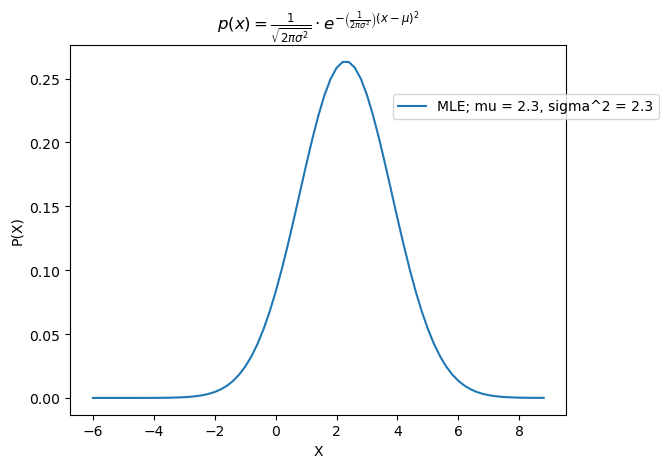

In [8]:
plt.plot(x_axs,MLE, label=f"MLE; mu = {mu:.1f}, sigma^2 = {sigma_sqr:.1f}")
plt.xlabel("X")
plt.ylabel("P(X)")
plt.title(r"$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\left( \frac{1}{2\pi\sigma^2} \right) (x - \mu)^2}$")
plt.legend(loc = (0.65,0.8))

### Task 2
###### Real parameter were given

In [10]:
real_mu = 2
real_sigma = 1.5
real_sigma_sqr = 1.5**2
real_MLE = calc_p(x_axs, real_mu, real_sigma_sqr)

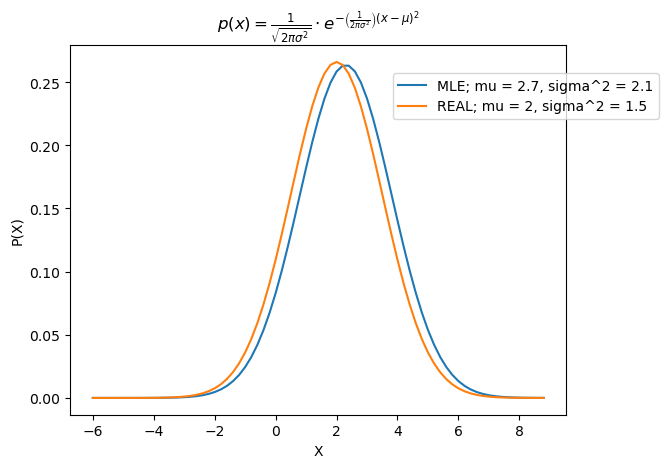

In [11]:
plt.plot(x_axs, MLE, label="MLE; mu = 2.7, sigma^2 = 2.1")
plt.plot(x_axs, real_MLE, label="REAL; mu = 2, sigma^2 = 1.5")
plt.xlabel("X")
plt.ylabel("P(X)")
plt.title(r"$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\left( \frac{1}{2\pi\sigma^2} \right) (x - \mu)^2}$")
plt.legend(loc = (0.65,0.8))

### Task 3
###### Generate 30 new samples around the real values of 𝜇 and $𝜎^2$

In [13]:
def gen_data(n, mu, sigma_sqr):
    samples = np.random.normal(mu, np.sqrt(real_sigma_sqr), n)
    #print (samples)
    return samples

In [14]:
samples_30 = gen_data(30, real_mu, real_sigma)
print(samples_30)

[ 6.14549467  1.14785404  0.67753843  2.03509978  3.19817222  0.52654623
  2.46479004  2.03844162  1.1014896   1.41126336  4.52887898  2.61514259
  4.50401158  1.53016983  5.157909    2.45550249  1.89758547  0.43939596
  0.58464765  2.72897081  3.3644888   1.05142184  1.17607161  4.40585905
 -1.16881072  3.85490154  1.21192363  3.49777046  3.22087446  2.38877932]


In [15]:
mu_30, sigma_sqr_30 = calc_parameters(samples_30)
MLE_30 = calc_p(x_axs, mu_30, sigma_sqr_30)

𝜇 = 2.3397394778829153
𝜎^2 = 2.5606163809769877
𝜎 = 1.6001926074622979


#### plotting singular graph

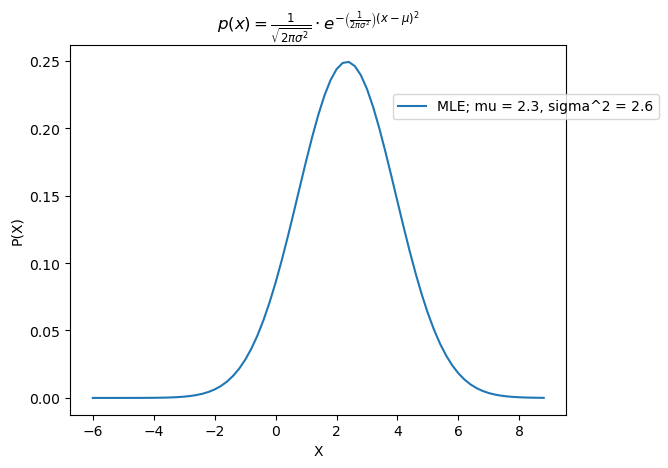

In [16]:
plt.plot(x_axs,MLE_30, label=f"MLE; mu = {mu_30:.1f}, sigma^2 = {sigma_sqr_30:.1f}")
plt.xlabel("X")
plt.ylabel("P(X)")
plt.title(r"$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\left( \frac{1}{2\pi\sigma^2} \right) (x - \mu)^2}$")
plt.legend(loc = (0.65,0.8))

#### plotting comparative graph

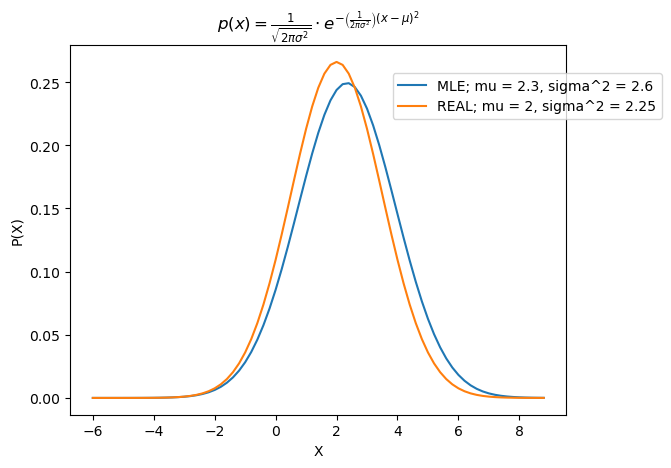

In [18]:
plt.plot(x_axs,MLE_30, label=f"MLE; mu = {mu_30:.1f}, sigma^2 = {sigma_sqr_30:.1f}")
plt.plot(x_axs, real_MLE, label="REAL; mu = 2, sigma^2 = 2.25")

plt.xlabel("X")
plt.ylabel("P(X)")
plt.title(r"$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\left( \frac{1}{2\pi\sigma^2} \right) (x - \mu)^2}$")
plt.legend(loc = (0.65,0.8))

### Task 4
###### Repeat task 3 10 times

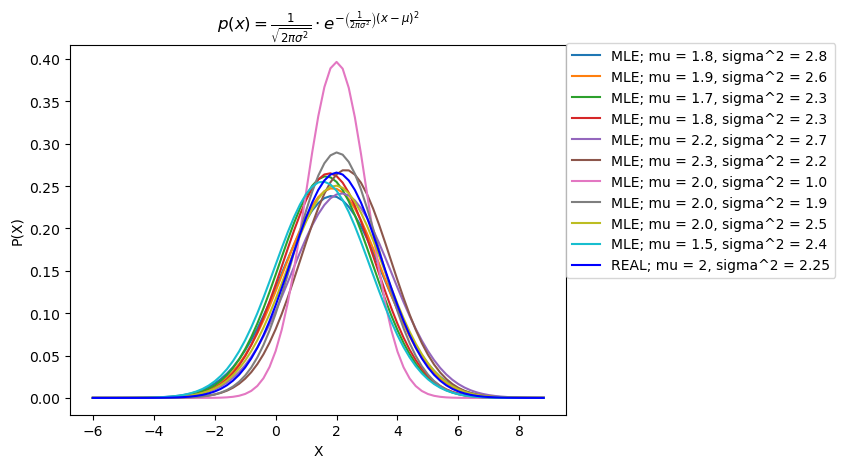

In [20]:
for i in range (0,10):
    samples = gen_data(30, real_mu, real_sigma)
    mu, sigma_sqr = calc_parameters(samples)
    MLE = calc_p(x_axs, mu, sigma_sqr)
    plt.plot(x_axs,MLE, label=f"MLE; mu = {mu:.1f}, sigma^2 = {sigma_sqr:.1f}")
plt.xlabel("X")
plt.ylabel("P(X)")
plt.title(r"$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\left( \frac{1}{2\pi\sigma^2} \right) (x - \mu)^2}$")
plt.plot(x_axs, real_MLE, label="REAL; mu = 2, sigma^2 = 2.25",color ='b')
plt.legend(loc = (1,0.37))
plt.show()

### Task 5
###### Redo task 4 but with N=3000

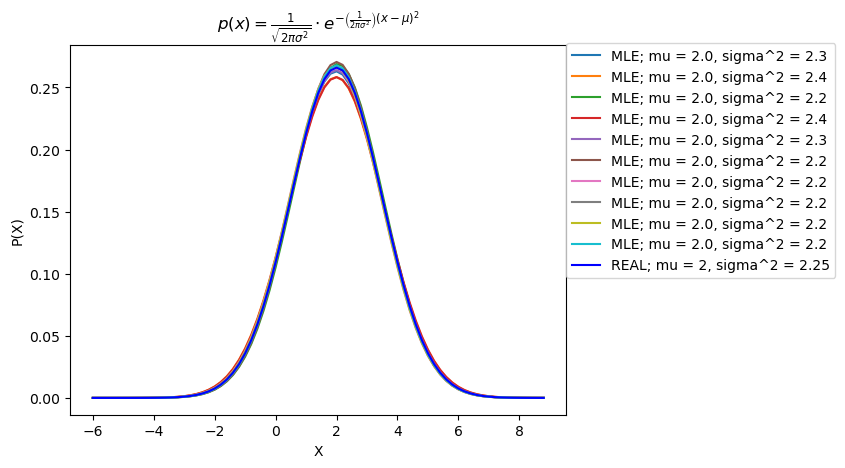

In [21]:
for i in range (0,10):
    samples = gen_data(3000, real_mu, real_sigma)
    mu, sigma_sqr = calc_parameters(samples)
    MLE = calc_p(x_axs, mu, sigma_sqr)
    plt.plot(x_axs,MLE, label=f"MLE; mu = {mu:.1f}, sigma^2 = {sigma_sqr:.1f}")
plt.xlabel("X")
plt.ylabel("P(X)")
plt.title(r"$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\left( \frac{1}{2\pi\sigma^2} \right) (x - \mu)^2}$")
plt.plot(x_axs, real_MLE, label="REAL; mu = 2, sigma^2 = 2.25",color ='b')
plt.legend(loc = (1,0.37))
plt.show()

We can see that the bigger the data set (size of N) - the accuracy of the estimation is improving. We can also tell that by looking at the average and sigma values: they slightly (if ever) differ from each other, unlike the variance of smaller dataset like in task 4.